<img src="https://avatars.githubusercontent.com/u/74911464?s=200&v=4"
     alt="OpenEO Platform logo"
     style="float: left; margin-right: 10px;" />
## openEO Platform DEMO

Having a look at the ar BOA_Sentinel_2 data for a specific region - Bonn

In [1]:
import openeo
from eo_utils import openeoMap
from openeo.util import to_bbox_dict

In [2]:
openeo.client_version()

'0.10.1'

## Connect to openEO

Via egi-checkin using the aggregator

In [3]:
openeo_aggregator = "openeo.cloud"
conn = openeo.connect(openeo_aggregator)

In [4]:
conn = conn.authenticate_oidc()

Authenticated using refresh token.


In [5]:
conn.describe_account()["default_plan"]

'early-adopter'

List and describe available collections

In [7]:
conn.list_collections()

[{'description': 'Sentinel 1 GRD Sigma0, mosaic of all ascending relative orbits. Backscatter values are provided as natural number, not in decibel. Provided by Terrascope.\n\n Use [this viewer](https://viewer.terrascope.be/?language=en&bbox=2.8531494643539195,50.29627033037724,6.36877446435392,51.454777120718546&overlay=true&bgLayer=Satellite&date=2020-10-15&layer=CGS_S1_GRD_SIGMA0) to explore the data.',
  'extent': {'spatial': {'bbox': [[-180, -56, 180, 83]]},
   'temporal': {'interval': [['2015-07-06T00:00:00Z', None]]}},
  'id': 'S1_GRD_SIGMA0_ASCENDING',
  'keywords': ['VITO',
   'TERRASCOPE',
   'COPERNICUS',
   'ESA',
   'Orthoimagery',
   'SENTINEL-1',
   'C-SAR',
   'Level-3',
   'Radar',
   'Radar Backscatter'],
  'license': 'free',
  'links': [{'href': 'https://docs.terrascope.be/#/DataProducts/Sentinel-1/ProductsOverview',
    'rel': 'alternate',
    'title': 'Product web page.'},
   {'href': 'https://services.terrascope.be/wmts/v2',
    'rel': 'wmts',
    'wmts:layer': 'CGS_S1_GRD_SIGMA0'}],
  'providers': [{'name': 'Terrascope/VITO'}],
  'stac_extensions': ['datacube'],
  'stac_version': '0.9.0',
  'title': 'Sentinel 1 GRD Sigma0 product, VH, VV and angle.'},
 {'description': 'Sentinel 1 GRD Sigma0, mosaic of all descending relative orbits. Backscatter values are provided as natural number, not in decibel. Provided by Terrascope.\n\n Use [this viewer](https://viewer.terrascope.be/?language=en&bbox=2.8531494643539195,50.29627033037724,6.36877446435392,51.454777120718546&overlay=true&bgLayer=Satellite&date=2020-10-15&layer=CGS_S1_GRD_SIGMA0) to explore the data.',
  'extent': {'spatial': {'bbox': [[-180, -56, 180, 83]]},
   'temporal': {'interval': [['2015-07-06T00:00:00Z', None]]}},
  'id': 'S1_GRD_SIGMA0_DESCENDING',
  'keywords': ['VITO',
   'TERRASCOPE',
   'COPERNICUS',
   'ESA',
   'Orthoimagery',
   'SENTINEL-1',
   'C-SAR',
   'Level-3',
   'Radar',
   'Radar Backscatter'],
  'license': 'free',
  'links': [{'href': 'https://docs.terrascope.be/#/DataProducts/Sentinel-1/ProductsOverview',
    'rel': 'alternate',
    'title': 'Product web page.'},
   {'href': 'https://services.terrascope.be/wmts/v2',
    'rel': 'wmts',
    'wmts:layer': 'CGS_S1_GRD_SIGMA0'}],
  'providers': [{'name': 'Terrascope/VITO'}],
  'stac_extensions': ['datacube'],
  'stac_version': '0.9.0',
  'title': 'Sentinel 1 GRD Sigma0 product, VH, VV and angle.'},
 {'description': 'FAPAR Level-3 product at 10m resolution. Covers selected areas globally. This FAPAR is derived directly from ESA L2A products. The FAPAR quantifies the fraction of the solar radiation absorbed by live leaves for the photosynthesis activity. Then, it refers only to the green and alive elements of the canopy. The FAPAR depends on the canopy structure, vegetation element optical properties, atmospheric conditions, and angular configuration. \n\nFAPAR is recognized as an Essential Climate Variable (ECV) by the Global Climate Observing System (GCOS).',
  'extent': {'spatial': {'bbox': [[-180, -56, 180, 83]]},
   'temporal': {'interval': [['2015-07-06T00:00:00Z', None]]}},
  'id': 'TERRASCOPE_S2_FAPAR_V2',
  'keywords': ['VITO',
   'TERRASCOPE',
   'COPERNICUS',
   'ESA',
   'Orthoimagery',
   'SENTINEL-2',
   'MSI',
   'Level-3',
   'Radiometry',
   'Plant Resource',
   'FAPAR'],
  'license': 'proprietary',
  'links': [{'href': 'https://sentinel.esa.int/documents/247904/690755/Sentinel_Data_Legal_Notice',
    'rel': 'license'},
   {'href': 'https://services.terrascope.be/catalogue/description?collection=urn:eop:VITO:TERRASCOPE_S2_FAPAR_V2',
    'rel': 'alternate'},
   {'href': 'https://viewer.terrascope.be/?language=nl&bbox=0.9339867511378304,50.14520994379217,6.207424251137831,51.77292299745045&overlay=false&bgLayer=MapBox&date=2019-02-25T03:17:15.000Z&layer=CGS_S2_FAPAR',
    'rel': 'alternate',
    'title': 'Terrascope Viewer'},
   {'href': 'https://services.terrascope.be/wmts/v2',
    'rel': 'wmts',
    'wmts:layer': 'CGS_S2_FAPAR'}],
  'providers': [{'name': 'VITO, on

In [8]:
conn.describe_collection('boa_sentinel_2')

{'cube:dimensions': {'bands': {'type': 'bands',
   'values': ['B02',
    'B03',
    'B04',
    'B05',
    'B06',
    'B07',
    'B08',
    'B08',
    'B11',
    'B12']},
  't': {'extent': [['2015-07-04T12:00:00+00:00', '2021-06-22T12:00:00+00:00']],
   'type': 'temporal'},
  'x': {'axis': 'x',
   'extent': [4100000.0, 5500000.0],
   'reference_system': 'PROJCS["Azimuthal_Equidistant",GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Azimuthal_Equidistant"],PARAMETER["latitude_of_center",53],PARAMETER["longitude_of_center",24],PARAMETER["false_easting",5837287.81977],PARAMETER["false_northing",2121415.69617],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]',
   'type': 'spatial'},
  'y': {'axis': 'y',
   'extent': [900000.0, 2200000.0],
   'reference_system': 'PROJCS["Azimuthal_Equidistant",GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Azimuthal_Equidistant"],PARAMETER["latitude_of_center",53],PARAMETER["longitude_of_center",24],PARAMETER["false_easting",5837287.81977],PARAMETER["false_northing",2121415.69617],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]',
   'type': 'spatial'}},
 'description': 'Preprocessed analysis-ready-data (ARD) from Sentinel-2 processed with FORCE. ARD data can only be combined with other ARD data or loaded results of previous processed jobs. ARD data cannot be combined with Level-1 collections! As this is Level-2 (ARD) data, ARD processes (``ard_normalized_radar_backscatter()``, ``ard_surface_reflectance()``, ``sar_backscatter()``, ``atmospheric_correction()``) cannot be applied.',
 'extent': {'spatial': {'bbox': [[1.4211922929976784,
     41.388795496730424,
     19.38022689396854,
     52.43260595832486]]},
  'temporal': {'interval': [['2015-07-04T12:00:00Z',
     '2021-06-22T12:00:00Z']]}},
 'id': 'boa_sentinel_2',
 'item_assets': {'cloud': {'description': 'The QAI dataset contains bit-wise stored quality information for each pixel. The cloud state is available in bit 1-2.',
   'file:values': {'0': {'summary': 'clear', 'values': [0]},
    '1': {'summary': 'less confident cloud (i.e., buffered cloud)',
     'values': [1]},
    '2': {'summary': 'confident, opaque cloud', 'values': [2]},
    '3': {'summary': 'cirrus', 'values': [3]}},
   'roles': ['cloud', 'metadata'],
   'type': 'image/tiff; application=geotiff'},
  'cloud_shadow': {'description': 'The QAI dataset contains bit-wise stored quality information for each pixel. The cloud-shadow flag is available in bit 3.',
   'file:values': {'0': {'summary': 'no - no cloud-shadow on pixel',
     'values': [0]},
    '1': {'summary': 'yes - cloud-shadow on pixel', 'values': [1]}},
   'roles': ['cloud-shadow', 'metadata'],
   'type': 'image/tiff; application=geotiff'},
  'saturation': {'description': 'The QAI dataset contains bit-wise stored quality information for each pixel. The saturation flag is available in bit 9.',
   'file:values': {'0': {'summary': 'no - pixel is NOT saturated',
     'values': [0]},
    '1': {'summary': 'yes - pixel is saturated', 'values': [1]}},
   'roles': ['saturation', 'metadata'],
   'type': 'image/tiff; application=geotiff'}},
 'keywords': ['EODC', 'MSI', 'ESA', 'Copernicus', 'Sentinel-2', 'Level-2'],
 'license': 'proprietary',
 'links': [{'href': 'https://openeo.eodc.euv1.0', 'rel': 'root'},
  {'href': 'https://openeo.eodc.euv1.0/collections', 'rel': 'parent'},
  {'href': 'https://openeo.eodc.euv1.0/collections/boa_sentinel_2',
   'rel': 'self'},
  {'href': 'https://openeo.eodc.euv1.0/collections/boa_sentinel_2/items',
   'rel': 'items'},
  {'href': 'http://doi.org/10.3390/rs11091124', 'rel': 'about'},
  {'href': 'http://doi.org/10.1016/j.rse.2018.04.046', 'rel': 'cloud'},
  {'href': 'https://doi.org/10.3390/rs13010137', 'rel': 'snow-ice'},
  {'href': 'https://doi.org/10.3390/rs13010137', 'rel': 'land-water'},
  {'href': 'http:

In [9]:
conn.list_processes()

[{'categories': ['math'],
  'description': 'Computes the absolute value of a real number `x`, which is the "unsigned" portion of x and often denoted as *|x|*.\n\nThe no-data value `null` is passed through and therefore gets propagated.',
  'examples': [{'arguments': {'x': 0}, 'returns': 0},
   {'arguments': {'x': 3.5}, 'returns': 3.5},
   {'arguments': {'x': -0.4}, 'returns': 0.4},
   {'arguments': {'x': -3.5}, 'returns': 3.5}],
  'id': 'absolute',
  'links': [{'href': 'http://mathworld.wolfram.com/AbsoluteValue.html',
    'rel': 'about',
    'title': 'Absolute value explained by Wolfram MathWorld'}],
  'parameters': [{'description': 'A number.',
    'name': 'x',
    'schema': {'type': ['number', 'null']}}],
  'process_graph': {'if': {'arguments': {'accept': {'from_node': 'multiply'},
     'reject': {'from_parameter': 'x'},
     'value': {'from_node': 'lt'}},
    'process_id': 'if',
    'result': True},
   'lt': {'arguments': {'x': {'from_parameter': 'x'}, 'y': 0},
    'process_id': 'lt'},
   'multiply': {'arguments': {'x': {'from_parameter': 'x'}, 'y': -1},
    'process_id': 'multiply'}},
  'returns': {'description': 'The computed absolute value.',
   'schema': {'minimum': 0, 'type': ['number', 'null']}},
  'summary': 'Absolute value'},
 {'categories': ['math'],
  'description': 'Sums up the two numbers `x` and `y` (*`x + y`*) and returns the computed sum.\n\nNo-data values are taken into account so that `null` is returned if any element is such a value.\n\nThe computations follow [IEEE Standard 754](https://ieeexplore.ieee.org/document/8766229) whenever the processing environment supports it.',
  'examples': [{'arguments': {'x': 5, 'y': 2.5}, 'returns': 7.5},
   {'arguments': {'x': -2, 'y': -4}, 'returns': -6},
   {'arguments': {'x': 1, 'y': None}, 'returns': None}],
  'id': 'add',
  'links': [{'href': 'http://mathworld.wolfram.com/Sum.html',
    'rel': 'about',
    'title': 'Sum explained by Wolfram MathWorld'},
   {'href': 'https://ieeexplore.ieee.org/document/8766229',
    'rel': 'about',
    'title': 'IEEE Standard 754-2019 for Floating-Point Arithmetic'}],
  'parameters': [{'description': 'The first summand.',
    'name': 'x',
    'schema': {'type': ['number', 'null']}},
   {'description': 'The second summand.',
    'name': 'y',
    'schema': {'type': ['number', 'null']}}],
  'process_graph': {'sum': {'arguments': {'data': [{'from_parameter': 'x'},
      {'from_parameter': 'y'}],
     'ignore_nodata': False},
    'process_id': 'sum',
    'result': True}},
  'returns': {'description': 'The computed sum of the two numbers.',
   'schema': {'type': ['number', 'null']}},
  'summary': 'Addition of two numbers'},
 {'categories': ['cubes'],
  'description': 'Adds a new named dimension to the data cube.\n\nAfterwards, the dimension can be referred to with the specified `name`. If a dimension with the specified name exists, the process fails with a `DimensionExists` exception. The dimension label of the dimension is set to the specified `label`.',
  'exceptions': {'DimensionExists': {'message': 'A dimension with the specified name already exists.'}},
  'id': 'add_dimension',
  'parameters': [{'description': 'A data cube to add the dimension to.',
    'name': 'data',
    'schema': {'subtype': 'raster-cube', 'type': 'object'}},
   {'description': 'Name for the dimension.',
    'name': 'name',
    'schema': {'type': 'string'}},
   {'description': 'A dimension label.',
    'name': 'label',
    'schema': [{'type': 'number'}, {'type': 'string'}]},
   {'default': 'other',
    'description': 'The type of dimension, defaults to `other`.',
    'name': 'type',
    'optional': True,
    'schema': {'enum': ['spatial', 'temporal', 'bands', 'other'],
     'type': 'string'}}],
  'returns': {'description': 'The data cube with a newly added dimension. The new dimension has exactly one dimension label. All other dimensions remain unchanged.',
   'schema': {'subtype': 'raster-cube', 'type': 'object'}},
  'summary': 'Add a new dimension'},
 {'categor

#### Process data
Choose a collection and specify the spatial and temporal extents.

In [10]:

center = [50.73, 7.1]
zoom = 12

eoMap = openeoMap(center,zoom)
eoMap.map

Map(center=[50.73, 7.1], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

In [11]:

bbox = eoMap.getBbox()
spatial_extent = to_bbox_dict(bbox) 
print(spatial_extent)

{'west': 6.902160644531251, 'south': 50.686452924955525, 'east': 7.297668457031251, 'north': 50.773379018610875}


In [12]:
collection      = 'boa_sentinel_2'

temporal_extent = ["2019-04-01", "2019-04-30"] 
bands           = ["B02", "B03", "B04", "B08"] 

data = conn.load_collection(collection, spatial_extent=spatial_extent,bands=bands,temporal_extent=temporal_extent)

Think of processes you want to apply to the data. This could be a temporal mean. To remove outliers it makes sense to also clip the data to a specific range.

In [13]:
data_mean = data.reduce_dimension(reducer="mean", dimension="t")
data_mean_clipped = data_mean.apply(lambda x: x.clip(min=0, max=6000))

Save the data in the prefered output format.

In [14]:
data_mean_saved = data_mean_clipped.save_result(format="NetCDF") 

Have a quick look at the process graph

In [15]:
data_mean_saved.flat_graph()

{'loadcollection1': {'process_id': 'load_collection',
  'arguments': {'bands': ['B02', 'B03', 'B04', 'B08'],
   'id': 'boa_sentinel_2',
   'spatial_extent': {'west': 6.902160644531251,
    'south': 50.686452924955525,
    'east': 7.297668457031251,
    'north': 50.773379018610875},
   'temporal_extent': ['2019-04-01', '2019-04-30']}},
 'reducedimension1': {'process_id': 'reduce_dimension',
  'arguments': {'data': {'from_node': 'loadcollection1'},
   'dimension': 't',
   'reducer': {'process_graph': {'mean1': {'process_id': 'mean',
      'arguments': {'data': {'from_parameter': 'data'}},
      'result': True}}}}},
 'apply1': {'process_id': 'apply',
  'arguments': {'data': {'from_node': 'reducedimension1'},
   'process': {'process_graph': {'clip1': {'process_id': 'clip',
      'arguments': {'max': 6000, 'min': 0, 'x': {'from_parameter': 'x'}},
      'result': True}}}}},
 'saveresult1': {'process_id': 'save_result',
  'arguments': {'data': {'from_node': 'apply1'},
   'format': 'NetCDF',
 

Create a job that can be sent to the backend.

In [16]:
job = data_mean_saved.create_job(title = "BOA_S2_MEAN")
print(f"Batch job with id {job.job_id} has status  {job.status()}")

Batch job with id eodc-jb-8dc88ca6-74de-479a-b500-4cec38148e52 has status  created


Start the job on the backend.

In [17]:
job.start_job()
print(f"Batch job with id {job.job_id} has status  {job.status()}")

Batch job with id eodc-jb-8dc88ca6-74de-479a-b500-4cec38148e52 has status  running


In [7]:
job

<RESTJob job_id='eodc-jb-8dc88ca6-74de-479a-b500-4cec38148e52'>

In [8]:
print(f"Batch job with id {job.job_id} has status  {job.status()}")

Batch job with id eodc-jb-8dc88ca6-74de-479a-b500-4cec38148e52 has status  finished


#### Download results
Once the job status says it's finished, the results can be downloaded specifing the favored directory.

In [9]:
results = job.get_results()
metadata = results.get_metadata()
results.download_files("./demo_data/")

[PosixPath('demo_data/out_2022_05_24T04_48_34_EU010M_E046N019T1'),
 PosixPath('demo_data/out_2022_05_24T04_48_34_EU010M_E046N020T1'),
 PosixPath('demo_data/job-results.json')]

#### Have a look at the downloaded results


In [10]:
from eo_utils import tone_mapping

In [14]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

output_data = xr.open_dataset("./demo_data/out_2022_05_24T04_48_34_EU010M_E046N020T1")

In [15]:
output_data

<xarray.Dataset>
Dimensions:      (y: 1577, x: 2941)
Coordinates:
  * y            (y) float64 2.016e+06 2.016e+06 2.016e+06 ... 2e+06 2e+06 2e+06
  * x            (x) float64 4.64e+06 4.64e+06 4.64e+06 ... 4.669e+06 4.669e+06
    spatial_ref  int32 ...
    t            datetime64[ns] ...
Data variables:
    B02          (y, x) float64 ...
    B03          (y, x) float64 ...
    B04          (y, x) float64 ...
    B08          (y, x) float64 ...
Attributes:
    crs:                PROJCRS["Azimuthal_Equidistant",BASEGEOGCRS["WGS 84",...
    nodata:             -9999
    collection:         boa_sentinel_2
    datetime_from_dim:  2022-05-24 04:48:34.768593

In [16]:
output_data = output_data.where(output_data!=output_data.attrs["nodata"], np.nan)

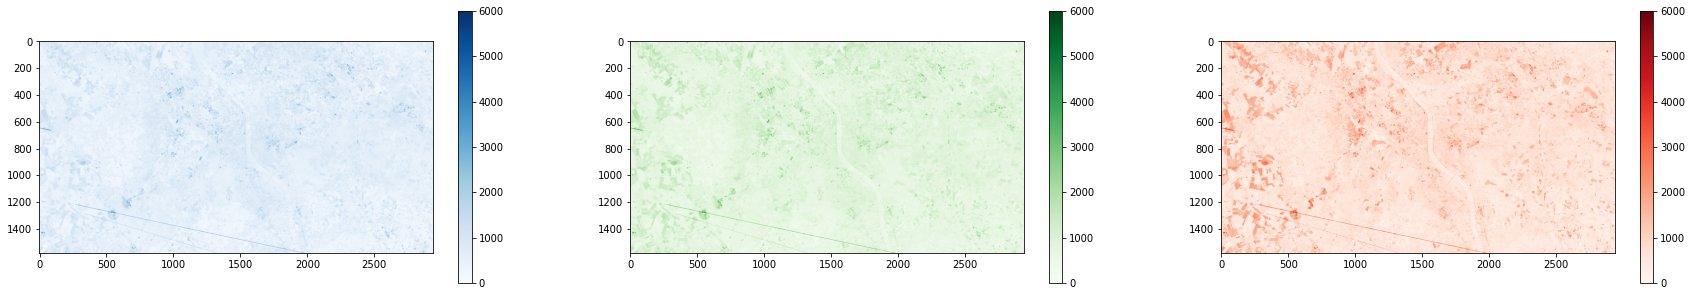

In [17]:
plt.figure(figsize=(30,5))
plt.subplot(1, 3, 1)
plt.imshow(output_data.B02, cmap='Blues')
plt.colorbar()
plt.subplot(1, 3, 2)
plt.imshow(output_data.B03, cmap='Greens')
plt.colorbar()
plt.subplot(1, 3, 3)
plt.imshow(output_data.B04, cmap="Reds")
plt.colorbar()

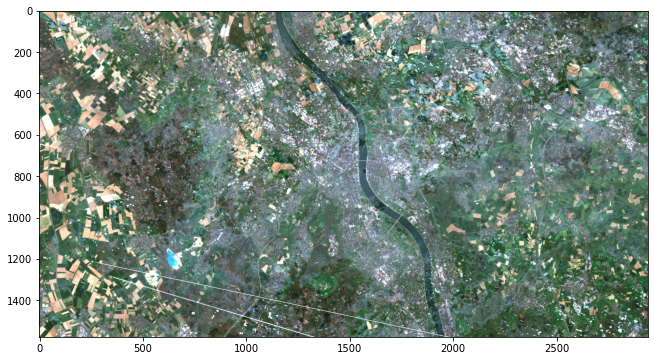

In [18]:
plt.figure(figsize=(12,6))
brg_icor = tone_mapping(output_data.B04,output_data.B03,output_data.B02)
plt.imshow(brg_icor,cmap='brg')
#plt.colorbar()